# Pivoting for Fun and Profit

In this exercise, we're going to continue working with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
%matplotlib inline
import pandas as pd

### BEGIN SOLUTION
condemns = pd.read_csv('/data/condemn.txt', low_memory=False)
condemns['Year']=pd.to_datetime(condemns['InspectDate'], format='%Y-%m-%d').dt.year

condemnations = condemns[(1986 <= condemns['Year']) & (condemns['Year'] <= 2014)]
### END SOLUTION


In [2]:
assert(condemnations.shape == (30232, 41))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [3]:
import numpy as np

### BEGIN SOLUTION

by_year = condemnations.pivot_table(
    values='AcctNum', 
    index='Year', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0)

### END SOLUTION

In [4]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

In [5]:
by_year

Status,B,L,R,W
Year,,,,
1986.0,22,12,19,112
1987.0,91,20,8,361
1988.0,215,16,15,297
1989.0,277,15,11,432
1990.0,119,29,8,322
1991.0,139,18,4,351
1992.0,204,30,4,258
1993.0,185,47,2,193
1994.0,208,94,5,293


## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then answer some questions.

For each of the questions, enter the anser as a variable: `answer = "X"`

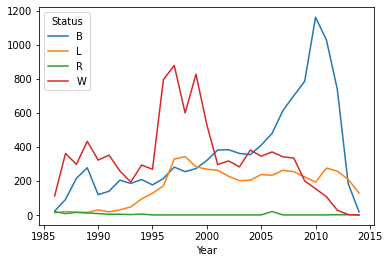

In [6]:
%matplotlib inline
by_year.plot()

## Question 3.1

Which Status value has the highest peak around the year 2010?

Provide your solution as `answer = 'Some Series Label'` for example `answer = 'L'`

In [7]:
answer = 'Some Series Label'

### BEGIN SOLUTION
answer = 'B'
### END SOLUTION

In [8]:
assert(type(answer) == str)
### BEGIN HIDDEN TESTS
assert(answer=='B')
### END HIDDEN TESTS

## Question 3.2

Which status value has the highest peak around 1996?


In [9]:

### BEGIN SOLUTION
answer = 'W'
### END SOLUTION

In [10]:
assert(type(answer) == str)
### BEGIN HIDDEN TESTS
assert(answer=='W')
### END HIDDEN TESTS

## Question 3.3

Which status value has the lowest overall usage?

In [11]:

### BEGIN SOLUTION
answer = 'R'
### END SOLUTION

In [12]:
assert(type(answer) == str)
### BEGIN HIDDEN TESTS
assert(answer=='R')
### END HIDDEN TESTS

## Question 3.4

Which status value has the highest overall peak in usage?


In [13]:

### BEGIN SOLUTION
answer = 'B'
### END SOLUTION

In [14]:
assert(type(answer) == str)
### BEGIN HIDDEN TESTS
assert(answer=='B')
### END HIDDEN TESTS